In [1]:
! pip list --not-required

Package   Version
--------- -------
ipykernel 7.1.0
pip       24.3.1
seaborn   0.13.2


In [2]:
# Import section 
import pandas as pd
import numpy as np
import os

In [3]:
# Load Dataset

csv_file = r'SRC\marketing_campaign.csv'
if not os.path.exists(csv_file):
    raise FileNotFoundError(f"File '{csv_file}' not found. Please place the dataset in this folder.")
    
df = pd.read_csv(csv_file, sep='\t')
backup = df.copy()
backup.to_csv("SRC/marketing_campaign_backup.csv", index=False)
print(f"Loaded dataset: {csv_file}")
print(f"Shape: {df.shape}")
print(f"Columns: {list(df.columns)}\n")
print(df.head())

Loaded dataset: SRC\marketing_campaign.csv
Shape: (2240, 29)
Columns: ['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response']

     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Custom

In [4]:
# clean Dataset

print(f"Missing values before cleaning:\n{df.isnull().sum()}")

df.columns = (
    df.columns
    .str.strip()                      # remove leading/trailing spaces
    .str.lower()                      # lowercase
    .str.replace(' ', '_')            # replace spaces with underscore
    .str.replace('[^0-9a-zA-Z_]', '', regex=True)  # remove special chars
)

# Drop Unnecessary Columns
df = df.loc[:, ~df.columns.str.contains('^Unnamed|ID$', case=False)]

# Handle Missing Values
# Numeric columns fill with median
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = df[numeric_cols].apply(lambda x: x.fillna(x.median()))


Missing values before cleaning:
ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64


In [5]:
print(f"Missing values After cleaning:\n{df.isnull().sum()}")


Missing values After cleaning:
year_birth             0
education              0
marital_status         0
income                 0
kidhome                0
teenhome               0
dt_customer            0
recency                0
mntwines               0
mntfruits              0
mntmeatproducts        0
mntfishproducts        0
mntsweetproducts       0
mntgoldprods           0
numdealspurchases      0
numwebpurchases        0
numcatalogpurchases    0
numstorepurchases      0
numwebvisitsmonth      0
acceptedcmp3           0
acceptedcmp4           0
acceptedcmp5           0
acceptedcmp1           0
acceptedcmp2           0
complain               0
z_costcontact          0
z_revenue              0
response               0
dtype: int64


In [6]:
# Remove Duplicates
df.drop_duplicates(inplace=True)

df.shape

(2058, 28)

In [7]:
df.dtypes

year_birth               int64
education               object
marital_status          object
income                 float64
kidhome                  int64
teenhome                 int64
dt_customer             object
recency                  int64
mntwines                 int64
mntfruits                int64
mntmeatproducts          int64
mntfishproducts          int64
mntsweetproducts         int64
mntgoldprods             int64
numdealspurchases        int64
numwebpurchases          int64
numcatalogpurchases      int64
numstorepurchases        int64
numwebvisitsmonth        int64
acceptedcmp3             int64
acceptedcmp4             int64
acceptedcmp5             int64
acceptedcmp1             int64
acceptedcmp2             int64
complain                 int64
z_costcontact            int64
z_revenue                int64
response                 int64
dtype: object

In [8]:
# Handle Outliers

for col in df.select_dtypes(include='number'):
    q1, q3 = df[col].quantile([0.25, 0.75])
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr

    # Newer, cleaner clip method
    df[col] = df[col].clip(lower=lower, upper=upper)

In [9]:
df.tail()

,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mntwines,mntfruits,...,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,z_costcontact,z_revenue,response
2233,1977,Graduation,Together,117053.625,1,0,02-06-2013,23,9.0,14,...,6,0,0,0,0,0,0,3,11,0
2235,1967,Graduation,Married,61223.000,0,1,13-06-2013,46,709.0,43,...,5,0,0,0,0,0,0,3,11,0
2237,1981,Graduation,Divorced,56981.000,0,0,25-01-2014,91,908.0,48,...,6,0,0,0,0,0,0,3,11,0
2238,1956,Master,Together,69245.000,0,1,24-01-2014,8,428.0,30,...,3,0,0,0,0,0,0,3,11,0
2239,1954,PhD,Married,52869.000,1,1,15-10-2012,40,84.0,3,...,7,0,0,0,0,0,0,3,11,0


In [10]:
# Save Cleaned file 
clean_path = "SRC/marketing_campaign_cleaned.csv"
df.to_csv(clean_path, index=False)

In [11]:
# Correlation Analysis

numeric_df = df.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr(method='pearson')

print("Pearson Correlation Matrix (Top 10 Features):\n")
print(corr_matrix.head(10))


Pearson Correlation Matrix (Top 10 Features):

                  year_birth    income   kidhome  teenhome   recency  \
year_birth          1.000000 -0.207521  0.244513 -0.360069 -0.021054   
income             -0.207521  1.000000 -0.527013  0.037473  0.000410   
kidhome             0.244513 -0.527013  1.000000 -0.046280  0.016657   
teenhome           -0.360069  0.037473 -0.046280  1.000000  0.022406   
recency            -0.021054  0.000410  0.016657  0.022406  1.000000   
mntwines           -0.168892  0.701954 -0.507713  0.007824  0.011410   
mntfruits          -0.042918  0.570915 -0.418394 -0.174774  0.005267   
mntmeatproducts    -0.067731  0.730991 -0.485228 -0.251187  0.012853   
mntfishproducts    -0.058060  0.575847 -0.427419 -0.204763 -0.001434   
mntsweetproducts   -0.029678  0.579554 -0.419043 -0.170227  0.024288   

                  mntwines  mntfruits  mntmeatproducts  mntfishproducts  \
year_birth       -0.168892  -0.042918        -0.067731        -0.058060   
income    

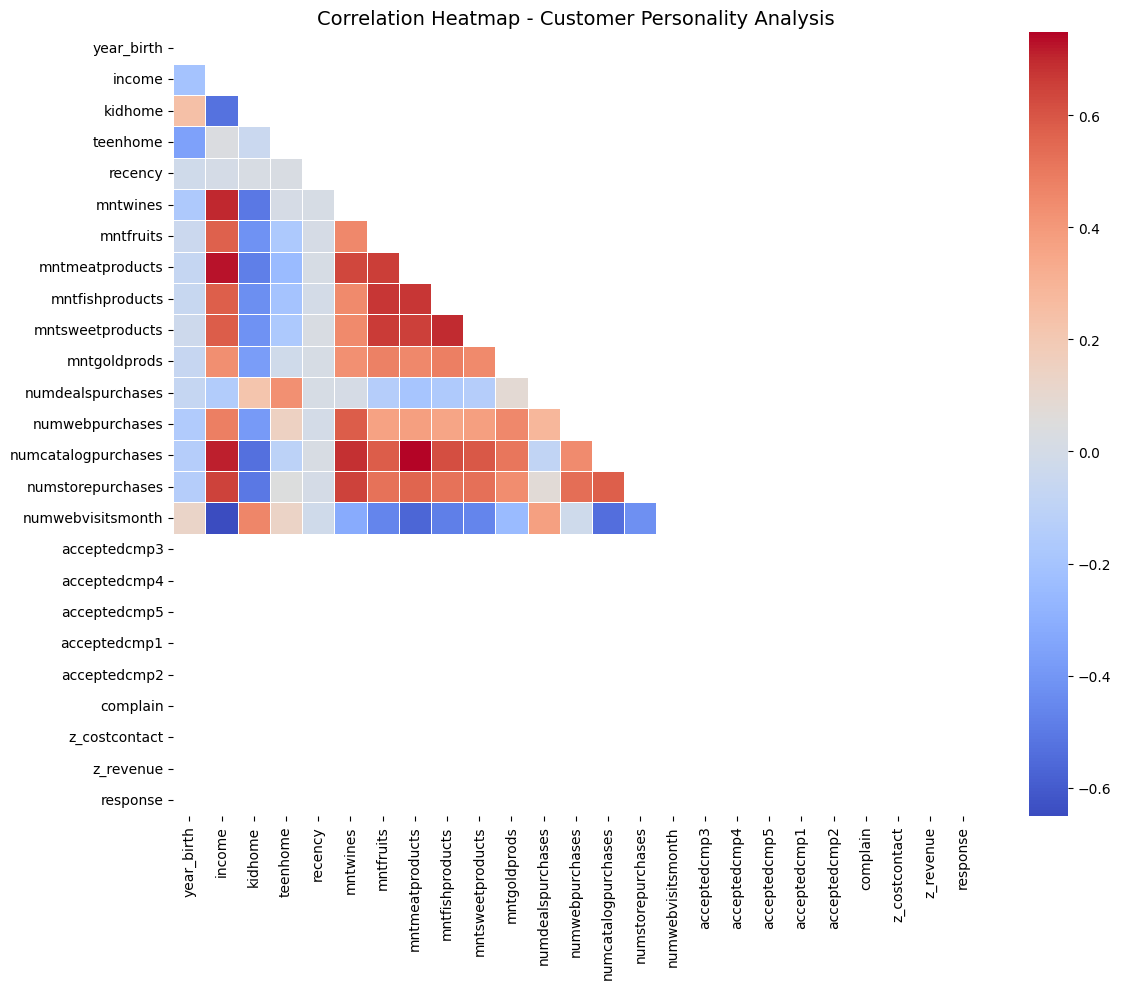

Saved: customer_correlation_heatmap.png


In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot Correlation Heatmap
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, mask=mask, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap - Customer Personality Analysis", fontsize=14)
plt.tight_layout()
plt.savefig("SRC/images/customer_correlation_heatmap.png", dpi=300)
plt.show()
print("Saved: customer_correlation_heatmap.png")

Top correlated features used for pairplot: ['mntmeatproducts', 'income', 'numcatalogpurchases', 'mntfishproducts', 'mntsweetproducts']


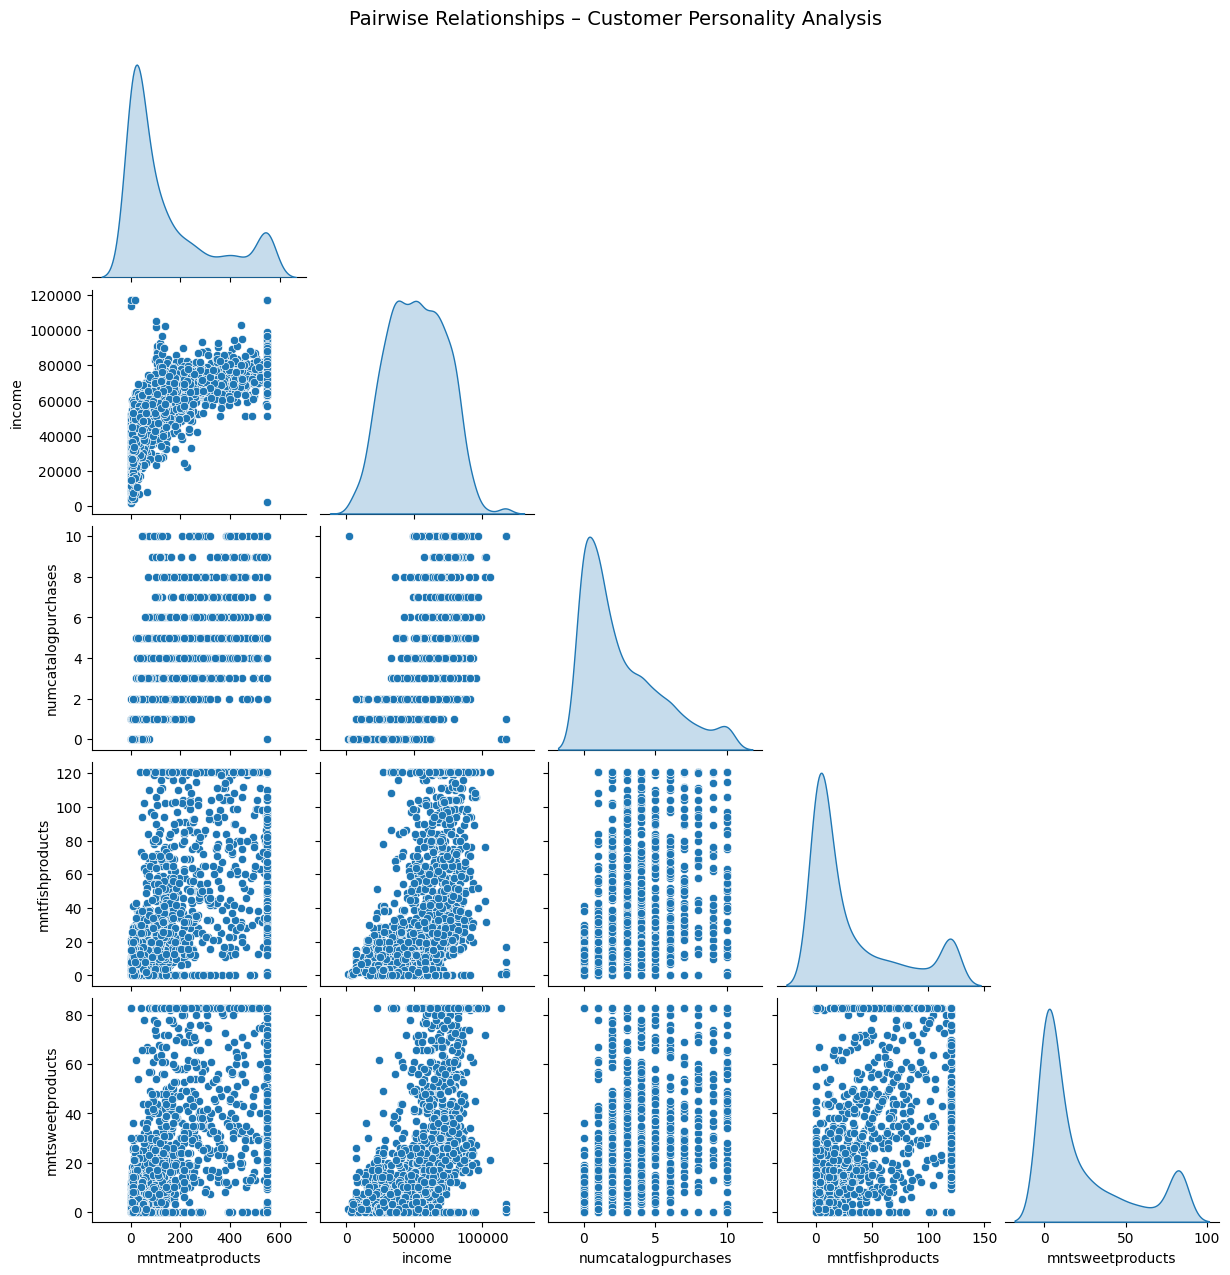

Saved: customer_pairplot.png


In [13]:
# Pairwise Relationships

top_features = numeric_df.corr().abs().sum().sort_values(ascending=False).head(5).index
print(f"Top correlated features used for pairplot: {list(top_features)}")
sns.pairplot(df[top_features], diag_kind='kde', corner=True)
plt.suptitle("Pairwise Relationships – Customer Personality Analysis", y=1.02, fontsize=14)
plt.savefig("SRC/images/customer_pairplot.png", dpi=300)
plt.show()
print("Saved: customer_pairplot.png")


In [14]:
# Strongest Correlations

corr_pairs = corr_matrix.unstack().drop_duplicates()
corr_pairs = corr_pairs[corr_pairs.index.get_level_values(0) != corr_pairs.index.get_level_values(1)]

strongest_pos = corr_pairs.sort_values(ascending=False).head(3)
strongest_neg = corr_pairs.sort_values().head(3)

print("Strongest Positive Correlations:")
print(strongest_pos)

print("Strongest Negative Correlations:")
print(strongest_neg)

Strongest Positive Correlations:
mntmeatproducts  numcatalogpurchases    0.747460
income           mntmeatproducts        0.730991
                 numcatalogpurchases    0.712883
dtype: float64
Strongest Negative Correlations:
income               numwebvisitsmonth   -0.649645
mntmeatproducts      numwebvisitsmonth   -0.566114
numcatalogpurchases  numwebvisitsmonth   -0.535708
dtype: float64
